# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = []
for lr in LEARNING_RATE:
    OPTIMIZER.append(keras.optimizers.SGD(lr = lr))
    OPTIMIZER.append(keras.optimizers.RMSprop(lr = lr))
    OPTIMIZER.append(keras.optimizers.Adagrad(lr = lr))
    OPTIMIZER.append(keras.optimizers.Adam(lr = lr))

In [34]:
results = {}
for op in OPTIMIZER:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with OP = %s" % (op))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = op
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=op)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-op-%s" % str(op)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with OP = <keras.optimizers.SGD object at 0x0000020251B1B470>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 

50000/50000 [==============================] - 17s 341us/step - loss: 0.7724 - accuracy: 0.7232 - val_loss: 1.5802 - val_accuracy: 0.5244
Epoch 49/50
50000/50000 [==============================] - 17s 346us/step - loss: 0.7504 - accuracy: 0.7335 - val_loss: 1.6976 - val_accuracy: 0.5079
Epoch 50/50
50000/50000 [==============================] - 17s 340us/step - loss: 0.7427 - accuracy: 0.7346 - val_loss: 1.9307 - val_accuracy: 0.4554
Experiment with OP = <keras.optimizers.RMSprop object at 0x0000020251B1B198>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______

Epoch 45/50
50000/50000 [==============================] - 20s 407us/step - loss: 2.3076 - accuracy: 0.1000 - val_loss: 2.3184 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 20s 409us/step - loss: 2.3081 - accuracy: 0.0994 - val_loss: 2.3087 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 20s 400us/step - loss: 2.3077 - accuracy: 0.0998 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 20s 401us/step - loss: 2.3078 - accuracy: 0.0999 - val_loss: 2.3137 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 20s 404us/step - loss: 2.3074 - accuracy: 0.1005 - val_loss: 2.3138 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 20s 408us/step - loss: 2.3076 - accuracy: 0.1010 - val_loss: 2.3180 - val_accuracy: 0.1000
Experiment with OP = <keras.optimizers.Adagrad object at 0x0000020251B1B3C8>
Model: "model_1"
______

50000/50000 [==============================] - 19s 385us/step - loss: 1.4487 - accuracy: 0.4809 - val_loss: 1.6106 - val_accuracy: 0.4305
Epoch 42/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.4418 - accuracy: 0.4841 - val_loss: 1.5955 - val_accuracy: 0.4380
Epoch 43/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.4410 - accuracy: 0.4842 - val_loss: 1.5819 - val_accuracy: 0.4438
Epoch 44/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.4322 - accuracy: 0.4854 - val_loss: 1.5494 - val_accuracy: 0.4539
Epoch 45/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.4249 - accuracy: 0.4903 - val_loss: 1.5404 - val_accuracy: 0.4536
Epoch 46/50
50000/50000 [==============================] - 19s 377us/step - loss: 1.4202 - accuracy: 0.4927 - val_loss: 1.6402 - val_accuracy: 0.4334
Epoch 47/50
50000/50000 [==============================] - 19s 375us/step - loss: 1.4189 - accuracy: 0.4917 - va

50000/50000 [==============================] - 23s 456us/step - loss: 2.3079 - accuracy: 0.0973 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 23s 455us/step - loss: 2.3064 - accuracy: 0.0996 - val_loss: 2.3128 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 22s 449us/step - loss: 2.3061 - accuracy: 0.1013 - val_loss: 2.3105 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 22s 449us/step - loss: 2.3069 - accuracy: 0.0986 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 23s 453us/step - loss: 2.3074 - accuracy: 0.0994 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 23s 451us/step - loss: 2.3070 - accuracy: 0.0987 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 22s 446us/step - loss: 2.3066 - accuracy: 0.0983 - va

50000/50000 [==============================] - 16s 326us/step - loss: 1.3301 - accuracy: 0.5339 - val_loss: 1.4752 - val_accuracy: 0.4706
Epoch 36/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.3333 - accuracy: 0.5321 - val_loss: 1.5060 - val_accuracy: 0.4642
Epoch 37/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.3198 - accuracy: 0.5376 - val_loss: 1.4650 - val_accuracy: 0.4711
Epoch 38/50
50000/50000 [==============================] - 17s 330us/step - loss: 1.3150 - accuracy: 0.5373 - val_loss: 1.4695 - val_accuracy: 0.4774
Epoch 39/50
50000/50000 [==============================] - 16s 325us/step - loss: 1.3069 - accuracy: 0.5415 - val_loss: 1.3844 - val_accuracy: 0.5043
Epoch 40/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.2995 - accuracy: 0.5424 - val_loss: 1.4107 - val_accuracy: 0.5041
Epoch 41/50
50000/50000 [==============================] - 16s 324us/step - loss: 1.2914 - accuracy: 0.5465 - va

50000/50000 [==============================] - 20s 402us/step - loss: 2.3031 - accuracy: 0.0974 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 20s 394us/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.3031 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.3030 - accuracy: 0.0998 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.3030 - accuracy: 0.0992 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 20s 397us/step - loss: 2.3032 - accuracy: 0.0976 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.3032 - accuracy: 0.0990 - va

Epoch 28/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.2213 - accuracy: 0.5699 - val_loss: 1.5067 - val_accuracy: 0.4730
Epoch 29/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.2049 - accuracy: 0.5763 - val_loss: 1.4603 - val_accuracy: 0.4870
Epoch 30/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.1973 - accuracy: 0.5785 - val_loss: 1.4187 - val_accuracy: 0.4938
Epoch 31/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.1853 - accuracy: 0.5825 - val_loss: 1.4479 - val_accuracy: 0.4938
Epoch 32/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.1788 - accuracy: 0.5845 - val_loss: 1.3917 - val_accuracy: 0.5162
Epoch 33/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.1681 - accuracy: 0.5899 - val_loss: 1.3935 - val_accuracy: 0.5158
Epoch 34/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.1581 - accuracy:

50000/50000 [==============================] - 23s 463us/step - loss: 1.4922 - accuracy: 0.4653 - val_loss: 1.5276 - val_accuracy: 0.4589
Epoch 26/50
50000/50000 [==============================] - 22s 435us/step - loss: 1.4812 - accuracy: 0.4687 - val_loss: 1.5774 - val_accuracy: 0.4349
Epoch 27/50
50000/50000 [==============================] - 22s 448us/step - loss: 1.4902 - accuracy: 0.4675 - val_loss: 1.5363 - val_accuracy: 0.4502
Epoch 28/50
50000/50000 [==============================] - 22s 442us/step - loss: 1.4697 - accuracy: 0.4723 - val_loss: 1.5855 - val_accuracy: 0.4352
Epoch 29/50
50000/50000 [==============================] - 23s 453us/step - loss: 1.4768 - accuracy: 0.4720 - val_loss: 1.5467 - val_accuracy: 0.4415
Epoch 30/50
50000/50000 [==============================] - 22s 433us/step - loss: 1.4877 - accuracy: 0.4676 - val_loss: 1.6108 - val_accuracy: 0.4319
Epoch 31/50
50000/50000 [==============================] - 21s 426us/step - loss: 1.4707 - accuracy: 0.4752 - va

50000/50000 [==============================] - 16s 315us/step - loss: 1.8034 - accuracy: 0.3685 - val_loss: 1.8016 - val_accuracy: 0.3742
Epoch 23/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.7975 - accuracy: 0.3711 - val_loss: 1.7964 - val_accuracy: 0.3710
Epoch 24/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.7917 - accuracy: 0.3739 - val_loss: 1.7888 - val_accuracy: 0.3759
Epoch 25/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.7861 - accuracy: 0.3750 - val_loss: 1.7844 - val_accuracy: 0.3799
Epoch 26/50
50000/50000 [==============================] - 16s 311us/step - loss: 1.7808 - accuracy: 0.3775 - val_loss: 1.7797 - val_accuracy: 0.3779
Epoch 27/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.7758 - accuracy: 0.3785 - val_loss: 1.7732 - val_accuracy: 0.3823
Epoch 28/50
50000/50000 [==============================] - 16s 314us/step - loss: 1.7708 - accuracy: 0.3815 - va

50000/50000 [==============================] - 19s 387us/step - loss: 1.2453 - accuracy: 0.5553 - val_loss: 1.4372 - val_accuracy: 0.4972
Epoch 20/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.2199 - accuracy: 0.5645 - val_loss: 1.5226 - val_accuracy: 0.4767
Epoch 21/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.2032 - accuracy: 0.5708 - val_loss: 1.5615 - val_accuracy: 0.4505
Epoch 22/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.1854 - accuracy: 0.5769 - val_loss: 1.6949 - val_accuracy: 0.4625
Epoch 23/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.1636 - accuracy: 0.5853 - val_loss: 1.6238 - val_accuracy: 0.4712
Epoch 24/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.1452 - accuracy: 0.5901 - val_loss: 1.5287 - val_accuracy: 0.4785
Epoch 25/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.1285 - accuracy: 0.5993 - va

50000/50000 [==============================] - 14s 281us/step - loss: 1.4561 - accuracy: 0.4906 - val_loss: 1.5051 - val_accuracy: 0.4627
Epoch 17/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.4457 - accuracy: 0.4954 - val_loss: 1.4917 - val_accuracy: 0.4687
Epoch 18/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.4363 - accuracy: 0.4982 - val_loss: 1.5223 - val_accuracy: 0.4526
Epoch 19/50
50000/50000 [==============================] - 15s 298us/step - loss: 1.4282 - accuracy: 0.5019 - val_loss: 1.4666 - val_accuracy: 0.4810
Epoch 20/50
50000/50000 [==============================] - 17s 333us/step - loss: 1.4184 - accuracy: 0.5038 - val_loss: 1.4717 - val_accuracy: 0.4771
Epoch 21/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.4119 - accuracy: 0.5062 - val_loss: 1.4842 - val_accuracy: 0.4726
Epoch 22/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.4025 - accuracy: 0.5120 - va

50000/50000 [==============================] - 22s 438us/step - loss: 1.2648 - accuracy: 0.5500 - val_loss: 1.4032 - val_accuracy: 0.5089
Epoch 14/50
50000/50000 [==============================] - 23s 456us/step - loss: 1.2637 - accuracy: 0.5494 - val_loss: 1.3802 - val_accuracy: 0.5160
Epoch 15/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.2316 - accuracy: 0.5597 - val_loss: 1.3818 - val_accuracy: 0.5156
Epoch 16/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.2179 - accuracy: 0.5650 - val_loss: 1.4277 - val_accuracy: 0.4991
Epoch 17/50
50000/50000 [==============================] - 17s 349us/step - loss: 1.1957 - accuracy: 0.5726 - val_loss: 1.3605 - val_accuracy: 0.5205
Epoch 18/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.1722 - accuracy: 0.5817 - val_loss: 1.3895 - val_accuracy: 0.5121
Epoch 19/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1533 - accuracy: 0.5892 - va

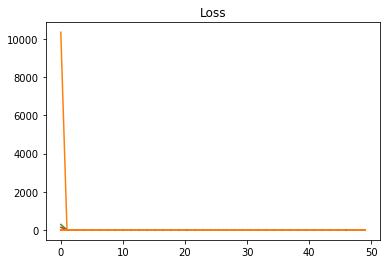

In [64]:
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    for j in results[cond]['valid-loss']:
        if j <= 200:
            plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.show()

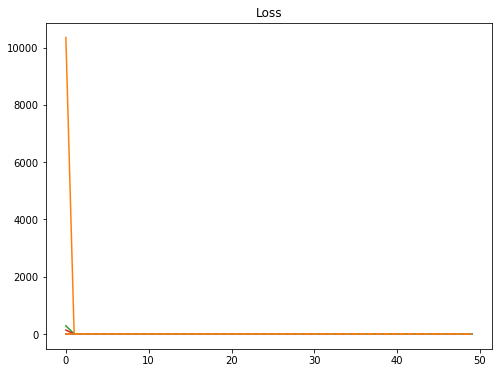

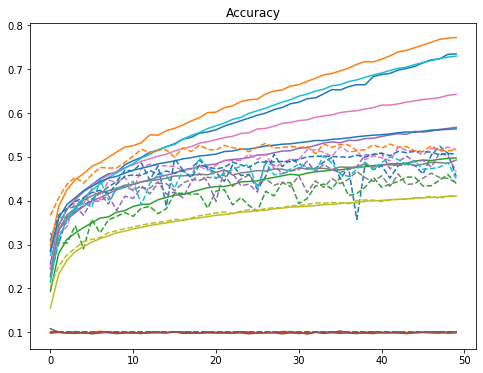

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = []
for i in range(0,12):
    color_bar.append('C' + str(i))

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.show()

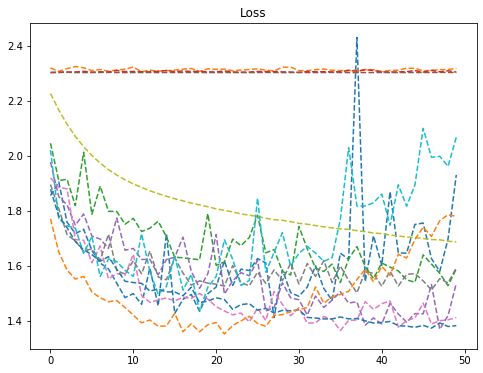

In [47]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.show()